## Import Libraries

In [ ]:
import os
import csv
import random
import datetime as dt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from google.colab import drive

## Mount Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Import Dataset

In [ ]:
PATH = 'drive/My Drive/Colab Notebooks/DSAI-2022/HW3'
print(os.listdir(PATH + '/data'))

['target1.csv', 'target10.csv', 'target0.csv', 'target16.csv', 'target18.csv', 'target14.csv', 'target11.csv', 'target15.csv', 'target17.csv', 'target12.csv', 'target13.csv', 'target19.csv', 'target20.csv', 'target21.csv', 'target22.csv', 'target2.csv', 'target23.csv', 'target24.csv', 'target26.csv', 'target25.csv', 'target27.csv', 'target29.csv', 'target30.csv', 'target28.csv', 'target3.csv', 'target33.csv', 'target32.csv', 'target31.csv', 'target34.csv', 'target37.csv', 'target35.csv', 'target36.csv', 'target39.csv', 'target40.csv', 'target38.csv', 'target4.csv', 'target41.csv', 'target43.csv', 'target45.csv', 'target42.csv', 'target44.csv', 'target46.csv', 'target48.csv', 'target5.csv', 'target49.csv', 'target47.csv', 'target7.csv', 'target9.csv', 'target8.csv', 'target6.csv']


In [ ]:
target = []
for i in range(0, 50):
  tmp = pd.read_csv(os.path.join(PATH + '/data', 'target'+ str(i) +'.csv'))
  target.append(tmp)

target[0]

,time,generation,consumption
0,2018-01-01 00:00:00,0.00,0.05
1,2018-01-01 01:00:00,0.00,1.52
2,2018-01-01 02:00:00,0.01,1.09
3,2018-01-01 03:00:00,0.00,0.95
4,2018-01-01 04:00:00,0.00,0.75
...,...,...,...
5827,2018-08-31 19:00:00,0.03,3.42
5828,2018-08-31 20:00:00,0.00,3.55
5829,2018-08-31 21:00:00,0.00,3.07
5830,2018-08-31 22:00:00,0.00,2.34


## Data Exploring

In [ ]:
avg_g = []
avg_c = []
max_g = []
max_c = []
min_g = []
min_c = []
for i in range(0, len(target[0])):
  sum_g = 0
  sum_c = 0
  tmp_max_g = -100
  tmp_max_c = -100
  tmp_min_g = 100
  tmp_min_c = 100
  for j in range(0, 50):
    tmp_g = float(target[j]['generation'][i])
    tmp_c = float(target[j]['consumption'][i])
    sum_g += tmp_g
    sum_c += tmp_c
    if(tmp_max_g < tmp_g):
      tmp_max_g = tmp_g
    if(tmp_max_c < tmp_c):
      tmp_max_c = tmp_c
    if(tmp_min_g > tmp_g):
      tmp_min_g = tmp_g
    if(tmp_min_c > tmp_c):
      tmp_min_c = tmp_c
  avg_g.append(sum_g / 50)
  avg_c.append(sum_c / 50)
  max_g.append(tmp_max_g)
  max_c.append(tmp_max_c)
  min_g.append(tmp_min_g)
  min_c.append(tmp_min_c)

Text(0.5, 0.98, '14 DAYS GENERATE')

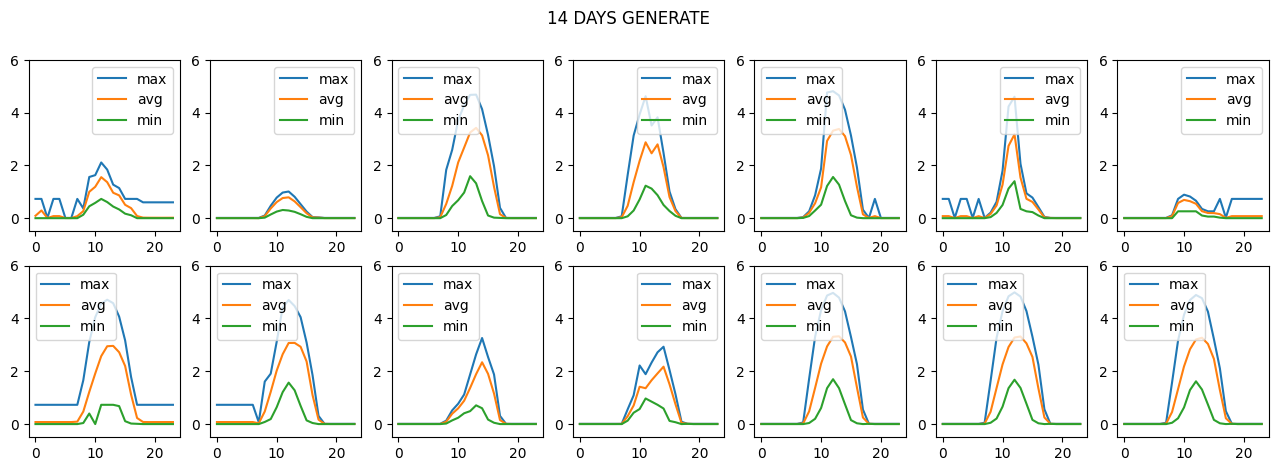

In [ ]:
plt.rcParams['figure.figsize'] = [16, 5]
plt.rcParams['figure.dpi'] = 100
for i in range(0, 14):
  plt.subplot(2, 7, i + 1)
  plt.ylim(-0.5, 6)
  plt.plot(
    max_g[24*i:24*(i+1)],
    label='max'
  )
  plt.plot(
    avg_g[24*i:24*(i+1)],
    label='avg'
  )
  plt.plot(
    min_g[24*i:24*(i+1)],
    label='min'
  )
  plt.legend()
plt.suptitle('14 DAYS GENERATE')

Text(0.5, 0.98, '14 DAYS CONSUME')

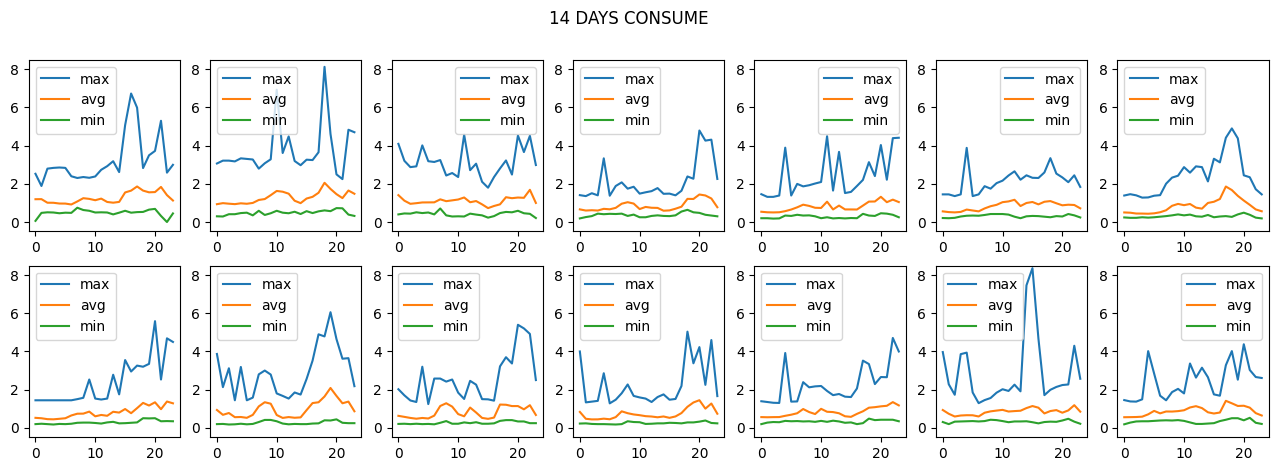

In [ ]:
plt.rcParams['figure.figsize'] = [16, 5]
plt.rcParams['figure.dpi'] = 100
for i in range(0, 14):
  plt.subplot(2, 7, i + 1)
  plt.ylim(-0.5, 8.5)
  plt.plot(
    max_c[24*i:24*(i+1)],
    label='max'
  )
  plt.plot(
    avg_c[24*i:24*(i+1)],
    label='avg'
  )
  plt.plot(
    min_c[24*i:24*(i+1)],
    label='min'
  )
  plt.legend()
plt.suptitle('14 DAYS CONSUME')

Text(0.5, 1.0, '1 WEEK')

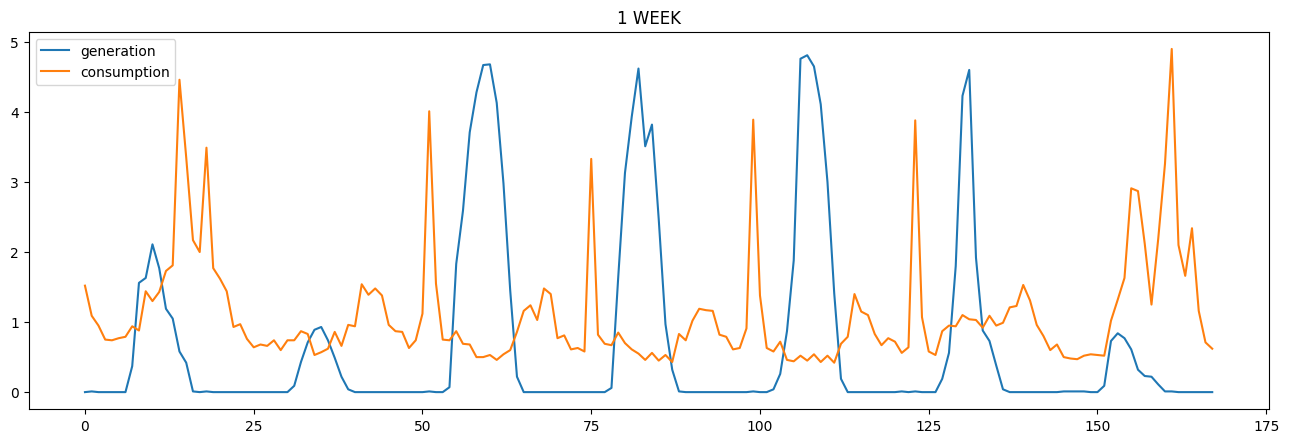

In [ ]:
DAYS = 7
plt.plot(
  list(map(float, target[0]['generation'][1:1+24*DAYS])),
  label='generation'
)
plt.plot(
  list(map(float, target[0]['consumption'][1:1+24*DAYS])),
  label='consumption'
)
plt.legend()
plt.title('1 WEEK')

## Data Preprocessing

In [ ]:
def featuring(df):
  df['time'] = pd.to_datetime(df['time'])
  df['year'] = pd.DatetimeIndex(df['time']).year
  df['month'] = pd.DatetimeIndex(df['time']).month
  df['day'] = pd.DatetimeIndex(df['time']).day
  df['hour'] = pd.DatetimeIndex(df['time']).hour
  df['weekday'] = pd.DatetimeIndex(df['time']).weekday
  return df

In [ ]:
for i in range(50):
  target[i] = featuring(target[i])

target[23]

,time,generation,consumption,year,month,day,hour,weekday
0,2018-01-01 00:00:00,0.01,1.75,2018,1,1,0,0
1,2018-01-01 01:00:00,0.01,1.26,2018,1,1,1,0
2,2018-01-01 02:00:00,0.01,0.80,2018,1,1,2,0
3,2018-01-01 03:00:00,0.01,0.81,2018,1,1,3,0
4,2018-01-01 04:00:00,0.01,0.89,2018,1,1,4,0
...,...,...,...,...,...,...,...,...
5827,2018-08-31 19:00:00,0.06,2.85,2018,8,31,19,4
5828,2018-08-31 20:00:00,0.01,2.71,2018,8,31,20,4
5829,2018-08-31 21:00:00,0.01,3.08,2018,8,31,21,4
5830,2018-08-31 22:00:00,0.01,5.73,2018,8,31,22,4


In [ ]:
df = pd.DataFrame()

for i in range(50):
  df = df.append(target[i], ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291600 entries, 0 to 291599
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time         291600 non-null  datetime64[ns]
 1   generation   291600 non-null  float64       
 2   consumption  291600 non-null  float64       
 3   year         291600 non-null  int64         
 4   month        291600 non-null  int64         
 5   day          291600 non-null  int64         
 6   hour         291600 non-null  int64         
 7   weekday      291600 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 17.8 MB


In [ ]:
def sliding_windows(data, seq_days, pred_days, type):
  x = []
  y = []
  
  for i in range(int(len(data) / 24) - seq_days - pred_days + 1):
    _x = data[i * 24 : (i + seq_days) * 24]
    if type == 'gen':
      _y = np.squeeze(data[(i + seq_days) * 24 : (i + seq_days + pred_days) * 24][:, 0:1])
    else:
      _y = np.squeeze(data[(i + seq_days) * 24 : (i + seq_days + pred_days) * 24][:, 1:2])

    x.append(_x)
    y.append(_y)

  return np.array(x), np.array(y)

In [ ]:
SEQ_DAYS = 7
PRED_DAYS = 1
TRAIN_RATIO = 0.8

In [ ]:
sc = MinMaxScaler()

tmp = df
tmp = tmp.drop(['time'], axis=1)
tmp = sc.fit_transform(tmp)

# generation
x, y = sliding_windows(tmp, SEQ_DAYS, PRED_DAYS, 'gen')

train_size = int(len(y) * TRAIN_RATIO)
test_size = len(y) - train_size

data_x = Variable(torch.Tensor(np.array(x)))
data_y = Variable(torch.Tensor(np.array(y)))

gen_train_x = Variable(torch.Tensor(np.array(x[0:train_size])))
gen_train_y = Variable(torch.Tensor(np.array(y[0:train_size])))

gen_test_x = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
gen_test_y = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

# consumption
x, y = sliding_windows(tmp, SEQ_DAYS, PRED_DAYS, 'con')

train_size = int(len(y) * TRAIN_RATIO)
test_size = len(y) - train_size

data_x = Variable(torch.Tensor(np.array(x)))
data_y = Variable(torch.Tensor(np.array(y)))

con_train_x = Variable(torch.Tensor(np.array(x[0:train_size])))
con_train_y = Variable(torch.Tensor(np.array(y[0:train_size])))

con_test_x = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
con_test_y = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

print('x shape', gen_train_x.shape)
print('y shape', gen_train_y.shape)

x shape torch.Size([9714, 168, 7])
y shape torch.Size([9714, 24])


## Model

In [ ]:
class LSTM(nn.Module):

  def __init__(self, num_classes, input_size, hidden_size, num_layers):
    super(LSTM, self).__init__()

    self.num_classes = num_classes
    self.num_layers = num_layers
    self.input_size = input_size
    self.hidden_size = hidden_size

    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                        num_layers=num_layers, batch_first=True)

    self.fc = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    h_0 = Variable(torch.zeros(
        self.num_layers, x.size(0), self.hidden_size))

    c_0 = Variable(torch.zeros(
        self.num_layers, x.size(0), self.hidden_size))

    # Propagate input through LSTM
    ula, (h_out, _) = self.lstm(x, (h_0, c_0))

    h_out = h_out.view(-1, self.hidden_size)

    out = self.fc(h_out)

    return out

## Training

In [ ]:
TRAINED = True

NUM_EPOCHS = 500
LEARNING_RATE = 0.01
INPUT_SIZE = 7 # feature count
HIDDEN_SIZE = 2
NUM_LAYERS = 1
NUM_CLASSES = PRED_DAYS * 24 # output count

gen_model = LSTM(NUM_CLASSES, INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS)
con_model = LSTM(NUM_CLASSES, INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
gen_optimizer = torch.optim.Adam(gen_model.parameters(), lr=LEARNING_RATE)
con_optimizer = torch.optim.Adam(con_model.parameters(), lr=LEARNING_RATE)

gen_train_losses = []
gen_test_losses = []
con_train_losses = []
con_test_losses = []

if not TRAINED:
  # Train the model of 'generation'
  for epoch in range(NUM_EPOCHS):
    outputs = gen_model(gen_train_x)
    gen_optimizer.zero_grad()

    with torch.no_grad():
      y_test_pred = gen_model(gen_test_x)
      test_loss = criterion(y_test_pred, gen_test_y)
      gen_test_losses.append(test_loss.item())

      # obtain the loss function
    loss = criterion(outputs, gen_train_y)
    
    loss.backward()

    gen_train_losses.append(loss.item())
    
    gen_optimizer.step()
    if epoch % 10 == 0:
      print(f"[Epoch {epoch}] train loss: {round(loss.item(), 4)}, test loss: {round(test_loss.item(), 4)}")
      
  print('Training of generation complete.')

if not TRAINED:
  # Train the model of 'consumption'
  for epoch in range(NUM_EPOCHS):
    outputs = con_model(con_train_x)
    con_optimizer.zero_grad()

    with torch.no_grad():
      y_test_pred = con_model(con_test_x)
      test_loss = criterion(y_test_pred, con_test_y)
      con_test_losses.append(test_loss.item())

    # obtain the loss function
    loss = criterion(outputs, con_train_y)
    
    loss.backward()

    con_train_losses.append(loss.item())
    
    con_optimizer.step()
    if epoch % 10 == 0:
      print(f"[Epoch {epoch}] train loss: {round(loss.item(), 4)}, test loss: {round(test_loss.item(), 4)}")
      
  print('Training of consumption complete.')

[Epoch 0] train loss: 0.1465, test loss: 0.1521
[Epoch 10] train loss: 0.0644, test loss: 0.0687
[Epoch 20] train loss: 0.03, test loss: 0.0328
[Epoch 30] train loss: 0.0196, test loss: 0.0208
[Epoch 40] train loss: 0.0173, test loss: 0.0176
[Epoch 50] train loss: 0.017, test loss: 0.0173
[Epoch 60] train loss: 0.0167, test loss: 0.0172
[Epoch 70] train loss: 0.0165, test loss: 0.017
[Epoch 80] train loss: 0.0165, test loss: 0.017
[Epoch 90] train loss: 0.0164, test loss: 0.017
[Epoch 100] train loss: 0.0164, test loss: 0.0169
[Epoch 110] train loss: 0.0163, test loss: 0.0168
[Epoch 120] train loss: 0.0162, test loss: 0.0167
[Epoch 130] train loss: 0.0162, test loss: 0.0167
[Epoch 140] train loss: 0.0161, test loss: 0.0166
[Epoch 150] train loss: 0.016, test loss: 0.0165
[Epoch 160] train loss: 0.0159, test loss: 0.0164
[Epoch 170] train loss: 0.0157, test loss: 0.0162
[Epoch 180] train loss: 0.0155, test loss: 0.016
[Epoch 190] train loss: 0.0152, test loss: 0.0157
[Epoch 200] train l

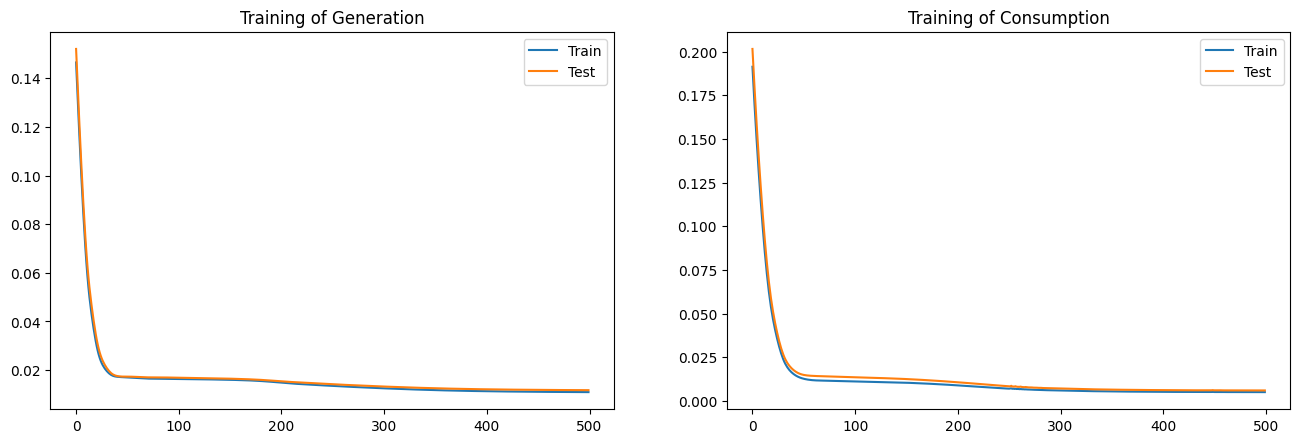

In [ ]:
if not TRAINED:
  plt.rcParams['figure.figsize'] = [16, 5]
  plt.rcParams['figure.dpi'] = 100

  plt.subplot(1, 2, 1)
  plt.plot(
    gen_train_losses,
    label='Train'
  )
  plt.plot(
    gen_test_losses,
    label='Test'
  )
  plt.title('Training of Generation')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(
    con_train_losses,
    label='Train'
  )
  plt.plot(
    con_test_losses,
    label='Test'
  )
  plt.title('Training of Consumption')
  plt.legend()

## Testing

In [ ]:
def inverse_data(data, sc, type):
  tmp = []
  inversed = []

  # reshape for sc input
  for day_data in data:
    for hour_data in day_data:
      if type == 'gen':
        expand_hour_data = np.array([hour_data, 0, 0, 0, 0, 0, 0])
      else:
        expand_hour_data = np.array([0, hour_data, 0, 0, 0, 0, 0])
      tmp.append(expand_hour_data)
  tmp = np.array(tmp)

  # sc inverse
  tmp = sc.inverse_transform(tmp)

  # reshape for output
  for hour_data in tmp:
    if type == 'gen':
      inversed.append(hour_data[0])
    else:
      inversed.append(hour_data[1])
  inversed = np.array(inversed)
  inversed = inversed.reshape(data.shape[0], data.shape[1])
  
  return inversed

(2429, 24)


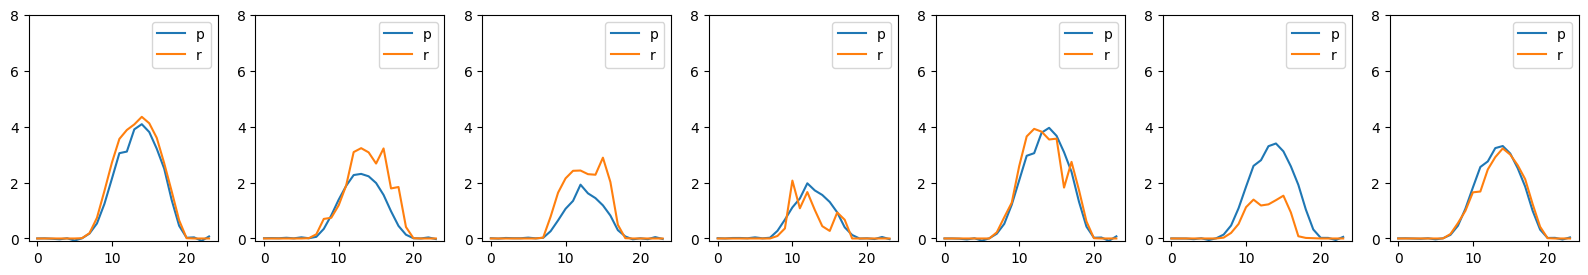

In [ ]:
# Testing of 'generation' model
if TRAINED:
  gen_model = torch.load(PATH + '/model/gen')
gen_model.eval()

pred = gen_model(gen_test_x)
pred = pred.data.numpy()
real = gen_test_y.data.numpy()

pred = inverse_data(pred, sc, 'gen')
real = inverse_data(real, sc, 'gen')

plt.rcParams['figure.figsize'] = [20, 3]
plt.rcParams['figure.dpi'] = 100

print(pred.shape)
for i in range(0, 7):
  rand_int = random.randint(0, len(pred))
  plt.subplot(1, 7, i + 1)
  plt.ylim(-0.1, 8)
  plt.plot(pred[i + rand_int], label='p')
  plt.plot(real[i + rand_int], label='r')
  plt.legend()

(2429, 24)


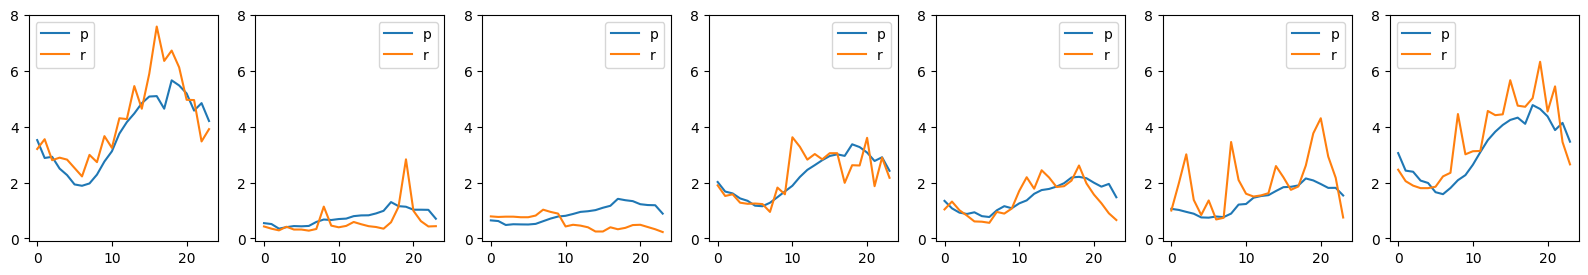

In [ ]:
# Testing of 'consumption' model
if TRAINED:
  con_model = torch.load(PATH + '/model/con')
con_model.eval()

pred = con_model(con_test_x)
pred = pred.data.numpy()
real = con_test_y.data.numpy()

pred = inverse_data(pred, sc, 'con')
real = inverse_data(real, sc, 'con')

plt.rcParams['figure.figsize'] = [20, 3]
plt.rcParams['figure.dpi'] = 100

print(pred.shape)
for i in range(0, 7):
  rand_int = random.randint(0, len(pred))
  plt.subplot(1, 7, i + 1)
  plt.ylim(-0.1, 8)
  plt.plot(pred[i + rand_int], label='p')
  plt.plot(real[i + rand_int], label='r')
  plt.legend()

## Saving Model

In [ ]:
torch.save(gen_model, PATH + '/model/gen')
torch.save(con_model, PATH + '/model/con')

## Sample Input Files

In [ ]:
print(os.listdir(PATH + '/sample'))

['generation.csv', 'bidresult.csv', 'output.csv', 'consumption.csv']


In [ ]:
sample_gen_df = pd.read_csv(PATH + '/sample/generation.csv')
sample_gen_df

,time,generation
0,2018-08-25 00:00:00,0.00
1,2018-08-25 01:00:00,0.00
2,2018-08-25 02:00:00,0.01
3,2018-08-25 03:00:00,0.01
4,2018-08-25 04:00:00,0.01
...,...,...
163,2018-08-31 19:00:00,0.03
164,2018-08-31 20:00:00,0.00
165,2018-08-31 21:00:00,0.00
166,2018-08-31 22:00:00,0.00


In [ ]:
sample_con_df = pd.read_csv(PATH + '/sample/consumption.csv')
sample_con_df

,time,consumption
0,2018-08-25 00:00:00,2.63
1,2018-08-25 01:00:00,4.15
2,2018-08-25 02:00:00,4.91
3,2018-08-25 03:00:00,5.15
4,2018-08-25 04:00:00,4.87
...,...,...
163,2018-08-31 19:00:00,3.42
164,2018-08-31 20:00:00,3.55
165,2018-08-31 21:00:00,3.07
166,2018-08-31 22:00:00,2.34


In [ ]:
sample_bid_result_df = pd.read_csv(PATH + '/sample/bidresult.csv')
sample_bid_result_df

,time,action,target_price,target_volume,trade_price,trade_volume,status
0,2018-09-02 06:00:00,buy,3.77,3.94,-1.00,0.00,未成交
1,2018-09-02 06:00:00,sell,2.94,3.58,-1.00,0.00,未成交
2,2018-09-03 06:00:00,buy,1.73,4.11,-1.00,0.00,未成交
3,2018-09-03 06:00:00,sell,5.49,3.09,-1.00,0.00,未成交
4,2018-09-04 21:00:00,buy,3.01,3.45,-1.00,0.00,未成交
5,2018-09-04 21:00:00,sell,3.81,3.80,-1.00,0.00,未成交
6,2018-09-05 10:00:00,buy,1.53,4.40,-1.00,0.00,未成交
7,2018-09-05 10:00:00,sell,5.24,3.72,-1.00,0.00,未成交
8,2018-09-06 02:00:00,buy,1.71,3.08,-1.00,0.00,未成交
9,2018-09-06 02:00:00,sell,3.48,2.82,-1.00,0.00,未成交


## Sample Output File

In [ ]:
sample_output_df = pd.read_csv(PATH + '/sample/output.csv')
sample_output_df

,time,action,target_price,target_volume
0,2018-09-01 14:00:00,buy,1.64,4.24
1,2018-09-01 14:00:00,sell,4.24,3.89


## Featuring

In [ ]:
def make_input(gen_df, con_df, sc):
  tmp = gen_df
  tmp['consumption'] = con_df['consumption']
  tmp = featuring(tmp)
  tmp = tmp.drop(['time'], axis=1)
  tmp = sc.fit_transform(tmp)
  tmp  = Variable(torch.Tensor(np.array([tmp])))
  return tmp

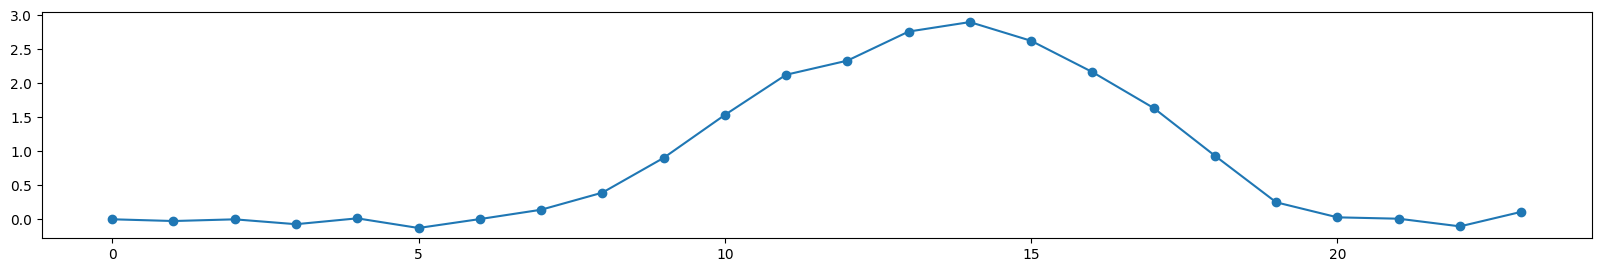

In [ ]:
tmp = make_input(sample_gen_df, sample_con_df, sc)

gen_model = torch.load(PATH + '/model/gen')
gen_model.eval()

pred = gen_model(tmp)
pred = pred.data.numpy()

pred = inverse_data(pred, sc, 'gen')
plt.plot(pred[0], marker='o')

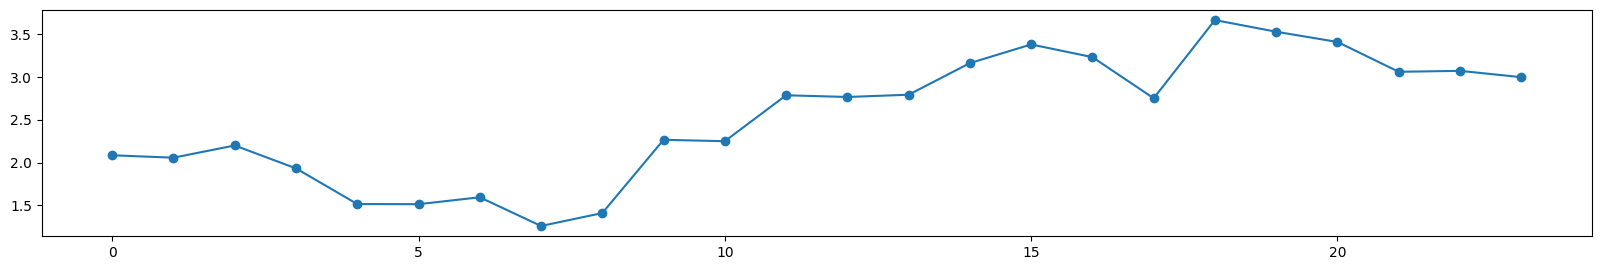

In [ ]:
tmp = make_input(sample_gen_df, sample_con_df, sc)

con_model = torch.load(PATH + '/model/con')
con_model.eval()

pred = con_model(tmp)
pred = pred.data.numpy()

pred = inverse_data(pred, sc, 'con')
plt.plot(pred[0], marker='o')